In [2]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.svm import SVC

In [4]:
x_data = np.load("x.npy")
y_data = np.load("y.npy")

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [39]:
import matplotlib.pyplot as plt

In [7]:
sss = StratifiedShuffleSplit(test_size=0.2)

In [8]:
for train_ix, test_ix in sss.split(x_data, y_data):
    x_train, x_test = x_data[train_ix], x_data[test_ix]
    y_train, y_test = y_data[train_ix], y_data[test_ix]

In [9]:
x_train.shape, x_test.shape

((80, 16), (21, 16))

In [11]:
classifier = SVC(kernel="linear", probability=True)

In [12]:
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
def performance(model, x, y):
    return np.mean(y == model.predict(x))

In [14]:
performance(classifier, x_test, y_test)

0.95238095238095233

In [17]:
performance(classifier, x_train, y_train)

1.0

In [18]:
predict_proba = classifier.predict_proba(x_test)

In [62]:
def plot_prcurve(model, x, y):
    proba = model.predict_proba(x)
    for class_ in np.unique(y)-1:
        y_class = np.asarray(y == class_, np.int32)
        y_prob = proba[:, class_]
        precision, recall, thresholds = precision_recall_curve(y_class, y_prob)
        plt.plot(recall, precision)

/home/nalin/.virtualenvs/tf/lib/python3.5/site-packages/sklearn/metrics/ranking.py:526: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


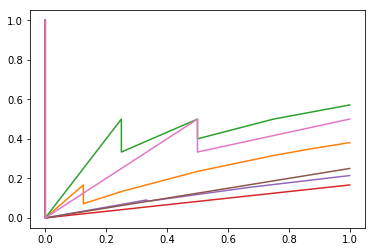

In [63]:
plot_prcurve(classifier, x_test, y_test)
plt.show()